In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm

$$P(LB \leqslant \theta \leqslant UB)=p$$
𝑝  - уровень доверия, другими словами вероятность того, что доверительный интервал содержит верное значение. 
 Границы LB и UB необходимо найти.


# Нормальное распределение

## Известная дисперсия
В этом случае формула доверительного интервала выглядит следующим образом:
$${P}\left( \bar{X} - z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} \le \mu \le \bar{X} + z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}\right) = 1-\alpha$$

Зафиксируем некоторое распределение

In [2]:
population = stats.norm.rvs(loc=2, scale=5, size=100000)

Сделаем сэмпл

In [3]:
sample_size = 100
sample = np.random.choice(a = population, size = sample_size)

In [4]:
sample_mean = sample.mean()
std_dev = population.std()

Найдём z-value

In [5]:
z_value = stats.norm.ppf(q = 0.975)  
print("z-value:", z_value)      

z-value: 1.959963984540054


В силу симметричности для левой границы:

In [6]:
stats.norm.ppf(q = 0.025)

-1.9599639845400545

Найдём доверительный интервал:

In [7]:
interval = z_value * (std_dev/np.sqrt(sample_size))
conf_inv = (sample_mean - interval, sample_mean + interval)  

print("Confidence interval:", conf_inv)

Confidence interval: (1.4183431680106628, 3.3673531608119176)


In [8]:
def compute_ci(sample, st_dev):
    
    z_value = stats.norm.ppf(q = 0.975)
    sample_size = len(sample)
    interval = z_value * (st_dev/np.sqrt(sample_size))
    conf_inv = (sample_mean - interval, sample_mean + interval)
    
    return conf_inv

Найдём доверительный интервал для выборки большего размера

In [9]:
np.random.seed(5)
sample_size = 2000
sample = np.random.choice(a = population, size = sample_size)

ci = compute_ci(sample, std_dev)

print("conf interval for 2000 sample size:", ci)

conf interval for 2000 sample size: (2.174942222774791, 2.6107541060477892)


## Неизвестная дисперсия

Если дисперсия нам неизвестна распределние Стьюдента может заменить нормальное.

$${P}\left( \bar{X} - t_{1-\frac{\alpha}{2},n-1} \frac{S}{\sqrt{n}} \le \mu \le \bar{X} + t_{1-\frac{\alpha}{2},n-1} \frac{S}{\sqrt{n}}\right) = 1-\alpha$$

In [10]:
#Алгоритм поиска доверительного интервала не отличается, только z-value заменяется на t-value:
def compute_ci_t(sample, alpha=0.95):
    
    n = sample.shape[0]
    mu, se = np.mean(sample), stats.sem(sample)
    bound = se * stats.t.ppf((1 + alpha) / 2., n-1)
    
    return mu - bound, mu + bound

In [11]:
taxi_mex = pd.read_csv('C:\\Users\\Астемир\\Desktop\\ML\\Courses\\coursera\\week2\\mex_clean.csv')

In [12]:
taxi_mex.dtypes

id                      int64
vendor_id              object
pickup_datetime        object
dropoff_datetime       object
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dist_meters             int64
wait_sec                int64
dtype: object

In [13]:
def generate_distribution_sample(data, sample_size, dist_size):
    
    sample_means = []
    for i in tqdm(range(dist_size)):
        sample = np.random.choice(a = data, size = sample_size)
        sample_means.append(np.mean(sample))
        
    return sample_means

In [14]:
sample_size = 10000
dist_size = 50000

In [15]:
sample_means = generate_distribution_sample(taxi_mex['dist_meters']/1000, sample_size, dist_size)

100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:29<00:00, 1718.43it/s]


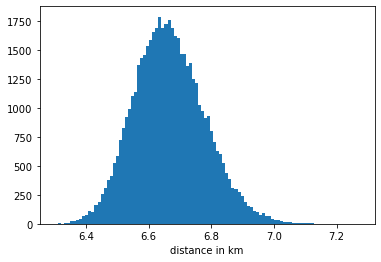

In [16]:
plt.hist(sample_means, bins=100);
plt.xlabel('distance in km');

In [17]:
np.sort(sample_means)
lb = np.percentile(sample_means, 2.5)
ub = np.percentile(sample_means, 97.5)
print("conf interval for bootstrap:", (lb, ub))

conf interval for bootstrap: (6.4607750025, 6.902380405000001)
